# Personal Information
**Name:** Ali Alghamdi

**Student ID:** 14988828

**Email:** ali.alghamdi@student.uva.nl

**Submitted on:** March 22nd, 2024

**GitHub Link:** https://github.com/alialghamdi/msc-thesis

# Description of this activity
In this exploratory data analysis (EDA), I delved into a rich textual dataset encapsulated within the `items` DataFrame, focusing primarily on the `cleaned_text`. My primary goal was to uncover underlying patterns, sentiments, and temporal trends inherent in the textual data. 

This comprehensive EDA offered valuable insights into the dataset's emotional and thematic landscape, demonstrating the power of textual analysis and visualization in uncovering the nuanced dynamics of written content over time.

## 1. Importing needed libraries and loading data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize

plt.style.use('bmh')

In [2]:
items = pd.read_csv('all_languages/items.csv', low_memory=False)
items_json = pd.read_json('all_languages/items.json')
items.head()

,@type,@id,@graph,label,source.@id,source.excerpts.0.@id,source.excerpts.0.value,source.excerpts.0.words.0,source.excerpts.0.words.1,source.excerpts.0.words.2,...,source.excerpts.1008.words.4,source.excerpts.1022.words.6,source.excerpts.1029.words.10,source.excerpts.1029.words.11,source.excerpts.1029.words.12,source.excerpts.1029.words.13,source.excerpts.1029.words.14,source.excerpts.1029.words.15,source.excerpts.1029.words.16,source.excerpts.53.words.11
0,http://data.odeuropa.eu/ontology/L11_Smell,http://data.odeuropa.eu/smell/a09e1c3c-f023-5e...,http://data.odeuropa.eu/british-library,smell,http://data.odeuropa.eu/source/56c5cda7-750c-5...,http://data.odeuropa.eu/source/56c5cda7-750c-5...,& # 34 ; Owd Siah waved his as he termed a thi...,sniffing,the party,betimes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://data.odeuropa.eu/ontology/L11_Smell,http://data.odeuropa.eu/smell/f0b09c02-636f-58...,http://data.odeuropa.eu/british-library,smelling,http://data.odeuropa.eu/source/faf7dfe0-f074-5...,http://data.odeuropa.eu/source/faf7dfe0-f074-5...,' Of course I do ? ' ' Then come for a Avalk a...,tobacco,perfume,cloying,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://data.odeuropa.eu/ontology/L11_Smell,http://data.odeuropa.eu/smell/432d7de5-5e8f-5c...,http://data.odeuropa.eu/medical-heritage,fragrance,http://data.odeuropa.eu/source/bf535b07-6801-5...,http://data.odeuropa.eu/source/bf535b07-6801-5...,"99 .To join the sweel smell of success , send ...",smell,sweel,of success,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://data.odeuropa.eu/ontology/L11_Smell,http://data.odeuropa.eu/smell/98df2b83-bf92-5d...,http://data.odeuropa.eu/medical-heritage,smells,http://data.odeuropa.eu/source/94970884-3365-5...,http://data.odeuropa.eu/source/94970884-3365-5...,The use of ventilating pipes carried to a heig...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://data.odeuropa.eu/ontology/L11_Smell,http://data.odeuropa.eu/smell/a6bb2658-5d41-53...,http://data.odeuropa.eu/gallica,aromates,http://data.odeuropa.eu/source/12eb0a96-d526-5...,http://data.odeuropa.eu/source/12eb0a96-d526-5...,"tout un , ont survécu à toutes les caducités s...",drogues,odorantes,drogues odorantes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Data investigation

Looking through this data, I saw how many of the texts are in English and filtered based on them. Additionally, explored some of the fields to have more understanding about it. 

/Users/alialghamdi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alialghamdi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alialghamdi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


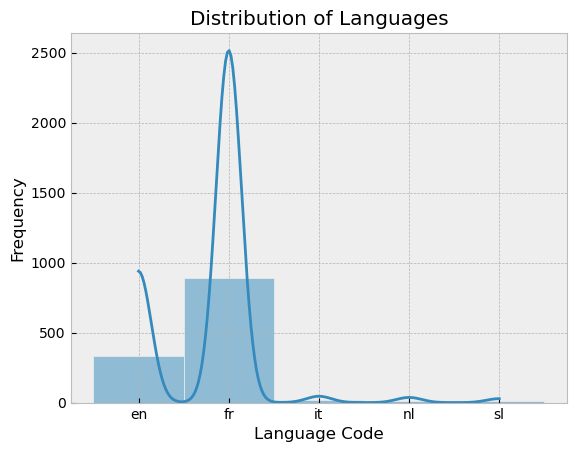

In [3]:
#Show the distribution of languages in the ME
sns.histplot(items['source.language'], kde=True) 

plt.title('Distribution of Languages') 
plt.xlabel('Language Code')
plt.ylabel('Frequency')

plt.show()


In [4]:
# Filtering by only English data

en_items = items[items['source.language'] == 'en']
en_items = en_items.reset_index(drop=True)
en_items.count()

@type                            332
@id                              332
@graph                           332
label                            259
source.@id                       332
                                ... 
source.excerpts.1029.words.13      0
source.excerpts.1029.words.14      0
source.excerpts.1029.words.15      0
source.excerpts.1029.words.16      0
source.excerpts.53.words.11        0
Length: 76211, dtype: int64

In [5]:
print(en_items['source.excerpts.1.value'][0])
print(en_items['source.author.0.label'][0]) 
print(en_items['source.date'][0]) 

179 With her arms linked in those of Lucy and Phœbe , Louise following with little Jim , Mrs .Bartlett made the circuit of the garden , criticizing and admiring alternately , falling into raptures over the crazy - looking old summer house as being so picturesque , but objecting to its vicinity to the farmyard , from which , certainly , there came , mingling with the perfume of the flowers , a not very odorous scent , for the Yorkshire farmers were then , as at the present time , noted for the profusion of straw and litter which they spread on their farmyards to be trampled over by cattle and swine .The currant and raspberry bushes were pronounced to be quite out of place in a flower garden , and Oh , my dear Miss exclaimed Mrs .
Barth FRICKER
1880


In [6]:
en_items.isnull().any()

@type                            False
@id                              False
@graph                           False
label                             True
source.@id                       False
                                 ...  
source.excerpts.1029.words.13     True
source.excerpts.1029.words.14     True
source.excerpts.1029.words.15     True
source.excerpts.1029.words.16     True
source.excerpts.53.words.11       True
Length: 76211, dtype: bool

## 3. Data exploration

Spending most of the time here, I will create a clean column and conduct Word Counts, TF-IDF, Word Clouds, Sentence Counts, Sentiment Polarity, trigrams then show sentiment polarity across the years to have some idea.

In [7]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def remove_urls(text):
    url_pattern = r'https?://\S+|www\.\S+'
    return re.sub(url_pattern, '', text)

en_items['cleaned_text'] = en_items.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)
en_items['cleaned_text'] = en_items['cleaned_text'].apply(remove_urls)


In [8]:
vectorizer = CountVectorizer(stop_words='english')

word_count_matrix = vectorizer.fit_transform(en_items['cleaned_text'])

word_count_sum = word_count_matrix.sum(axis=0)

vocab = vectorizer.get_feature_names_out()
counts = word_count_sum.A1  # Convert to a numpy array

word_counts = dict(zip(vocab, counts))

sorted_word_counts = sorted(zip(vocab, counts), key=lambda x: x[1], reverse=True)

df_word_counts = pd.DataFrame(sorted_word_counts[:25], columns=['Word', 'Count'])
df_word_counts

,Word,Count
0,smell,34080
1,odour,31248
2,water,15357
3,aromatic,15156
4,like,13334
5,fragrant,13231
6,flowers,13217
7,oil,13070
8,perfume,11303
9,scent,10804


In [9]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(en_items['cleaned_text'])

tfidf_sum = tfidf_matrix.sum(axis=0)

vocab = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_sum.A1  # Convert to a numpy array

sorted_tfidf = sorted(zip(vocab, tfidf_scores), key=lambda x: x[1], reverse=True)

df_tfidf = pd.DataFrame(sorted_tfidf[:25], columns=['Word', 'TF-IDF'])
df_tfidf

,Word,TF-IDF
0,smell,29.710644
1,odour,21.900521
2,fragrant,15.590806
3,flowers,14.788067
4,perfume,14.787002
5,aromatic,13.959155
6,scent,12.419372
7,water,12.389796
8,air,11.530696
9,like,11.390243


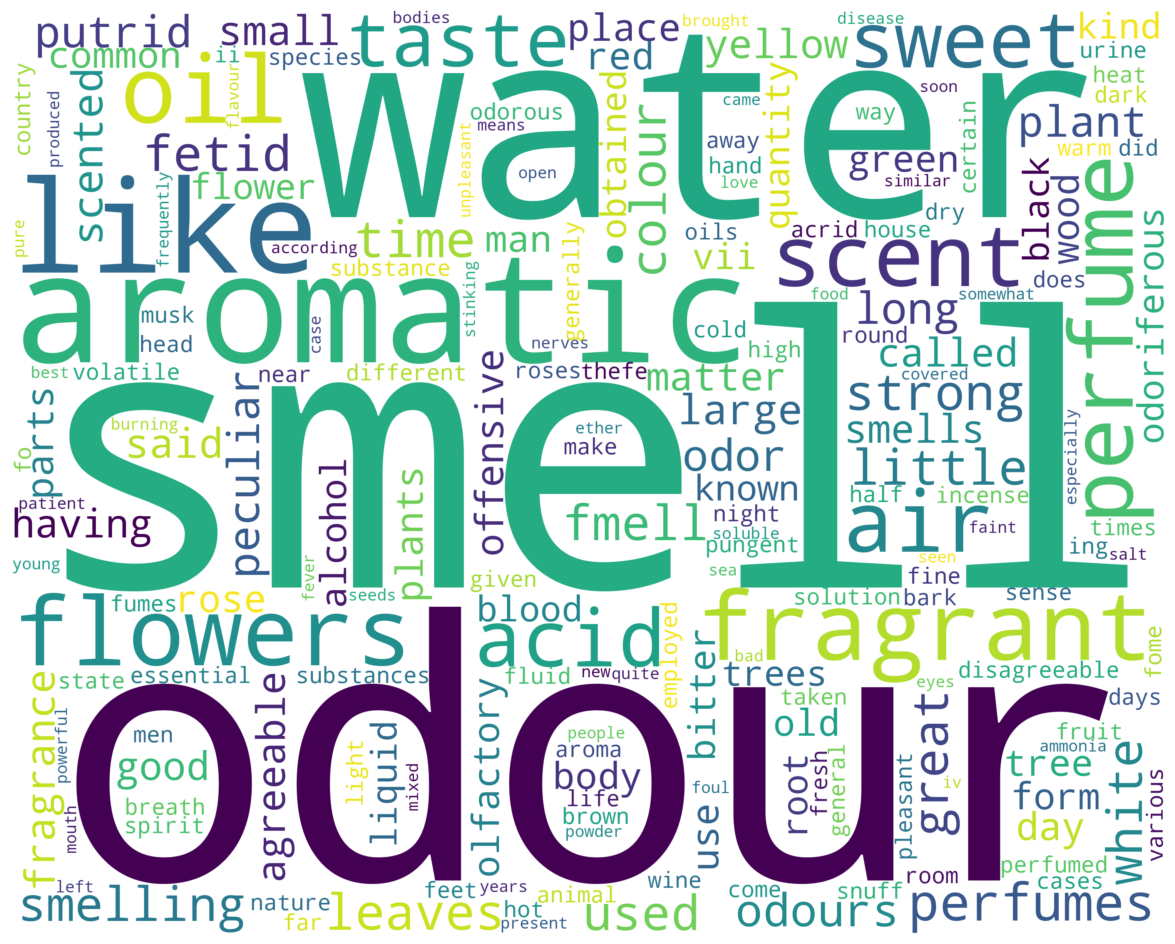

In [10]:
wordcloud = WordCloud(
    background_color='white',
    width=1500,
    height=1200,
    scale=2 
).generate_from_frequencies(word_counts)

plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
def count_sentences_and_words(text):
    # Tokenize sentences
    sentences = sent_tokenize(text)
    sentence_count = len(sentences)
    
    # Tokenize words
    words = word_tokenize(text)
    word_count = len(words)
    
    return sentence_count, word_count

en_items[['sentence_count', 'word_count']] = en_items['cleaned_text'].apply(
    lambda text: pd.Series(count_sentences_and_words(text))
)

en_items.sort_values(by='word_count', ascending=False)[['sentence_count', 'word_count']]

,sentence_count,word_count
308,12408,1112331
38,12408,1112329
138,6891,563858
105,4968,427883
33,5957,411168
...,...,...
114,3,115
28,2,110
18,4,95
201,3,93


In [12]:
vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3))
trigram_matrix = vectorizer.fit_transform(en_items['cleaned_text'])
trigram_counts = trigram_matrix.sum(axis=0)
trigrams = vectorizer.get_feature_names_out()
trigram_counts_dict = {trigram: int(count) for trigram, count in zip(trigrams, trigram_counts.A1)}
sorted_trigrams = sorted(trigram_counts_dict.items(), key=lambda x: x[1], reverse=True)
df_trigrams = pd.DataFrame(sorted_trigrams, columns=['Trigram', 'Count'])
df_trigrams.head(25)

,Trigram,Count
0,mystery lure perfume,760
1,soluble alcohol ether,161
2,sweet scented flowers,156
3,aromatic spirit ammonia,144
4,sort grows naturally,134
5,aromatic spirits ammonia,122
6,sweet smelling flowers,121
7,smelling sweet smelling,109
8,warren spring laboratory,107
9,soluble water alcohol,99


/Users/alialghamdi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alialghamdi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alialghamdi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


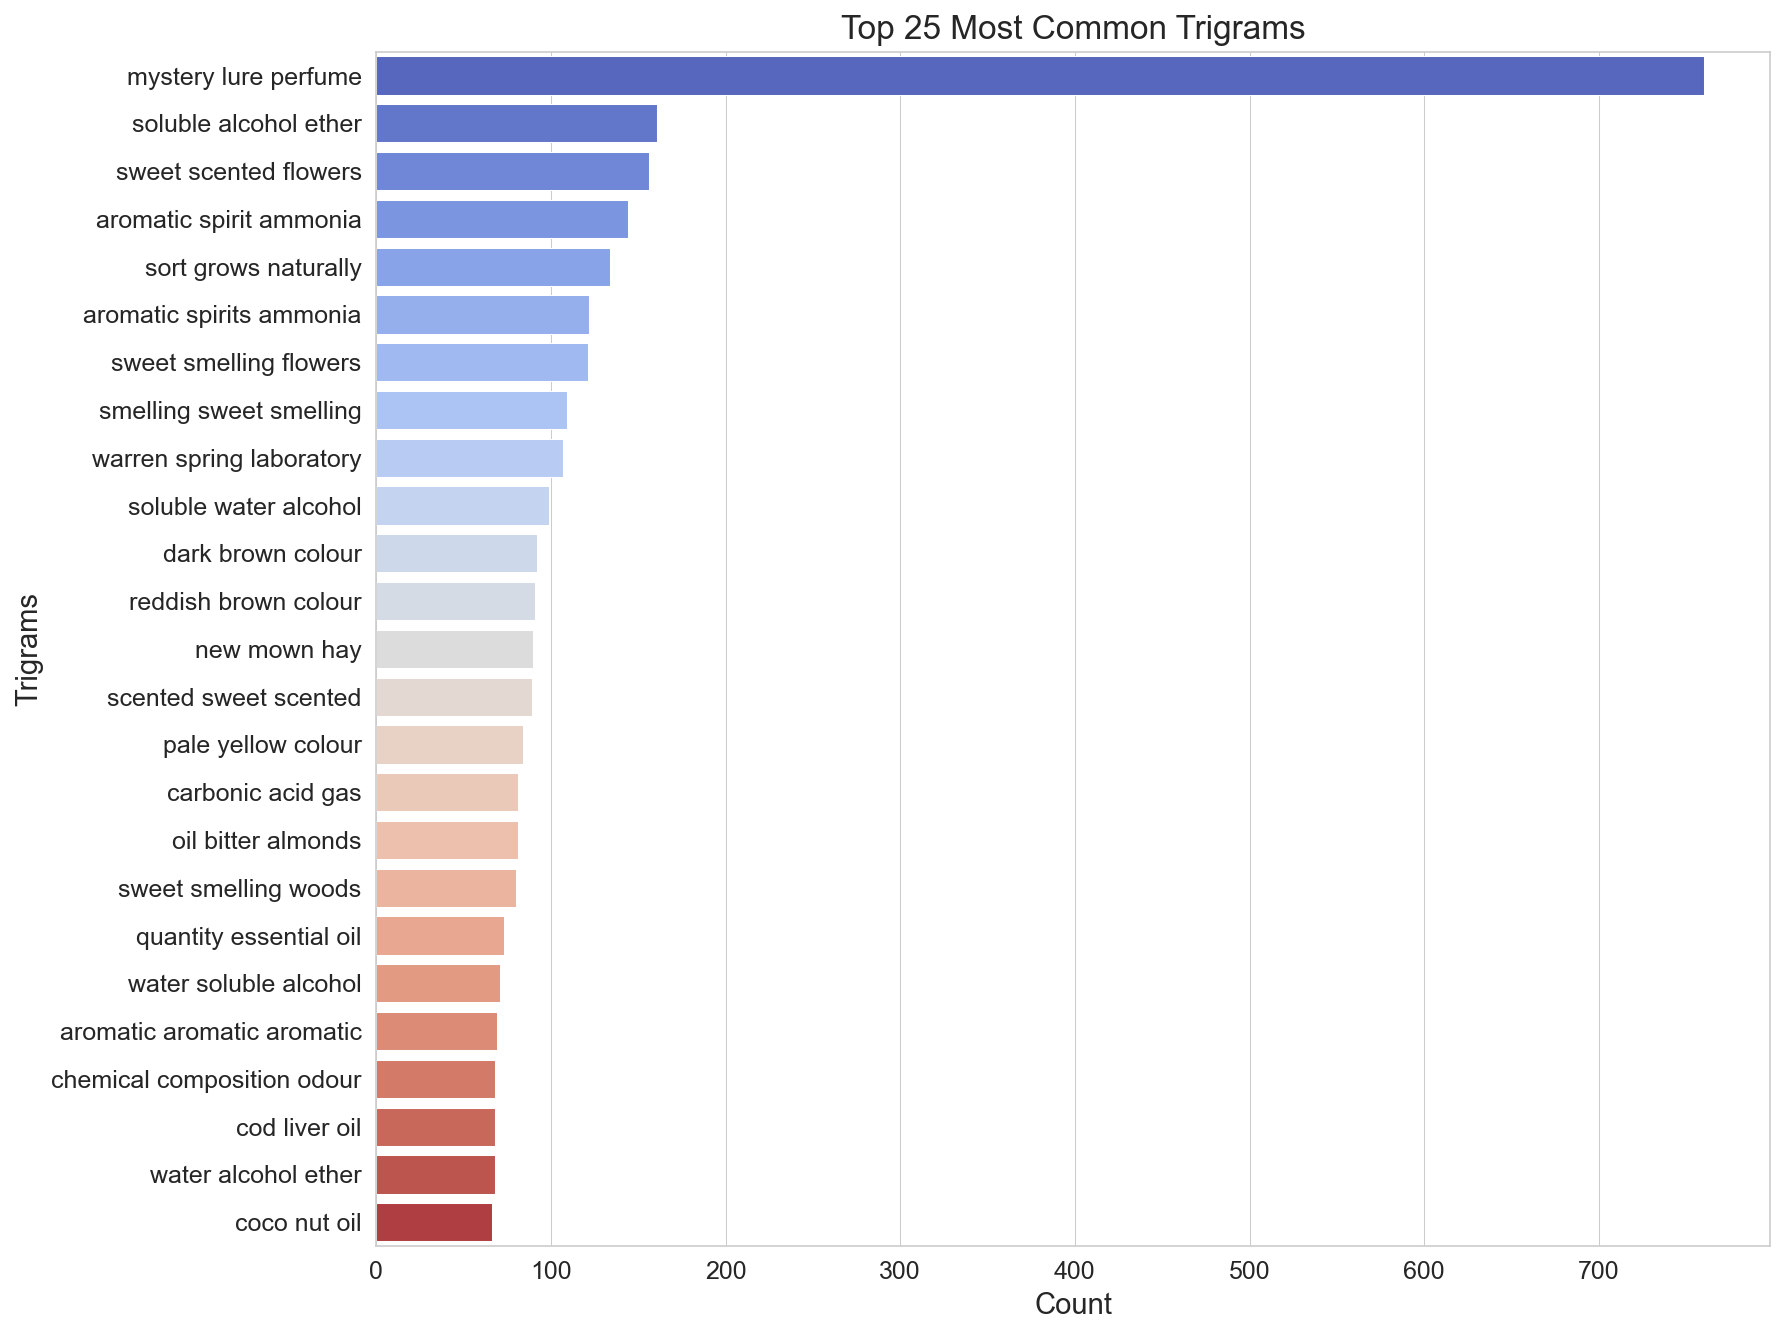

In [13]:
plt.rcParams['figure.dpi'] = 150
sns.set_style("whitegrid")
top_trigrams = df_trigrams.head(25)
plt.figure(figsize=(12, 9))
sns.barplot(x='Count', y='Trigram', data=top_trigrams, palette='coolwarm')
plt.title(f'Top 25 Most Common Trigrams', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Trigrams', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [14]:
def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity

en_items['sentiment_polarity'] = en_items['cleaned_text'].apply(analyze_sentiment)

print(en_items[['cleaned_text', 'sentiment_polarity']].head())


                                        cleaned_text  sentiment_polarity
0     smell   & # 34 ; Owd Siah waved his as he t...            0.131170
1     smelling   ' Of course I do ? ' ' Then come...            0.118763
2     fragrance   99 .To join the sweel smell of ...            0.186711
3     smells   The use of ventilating pipes carri...            0.156522
4     scent   The forests , which cover a large p...            0.121829


/Users/alialghamdi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alialghamdi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


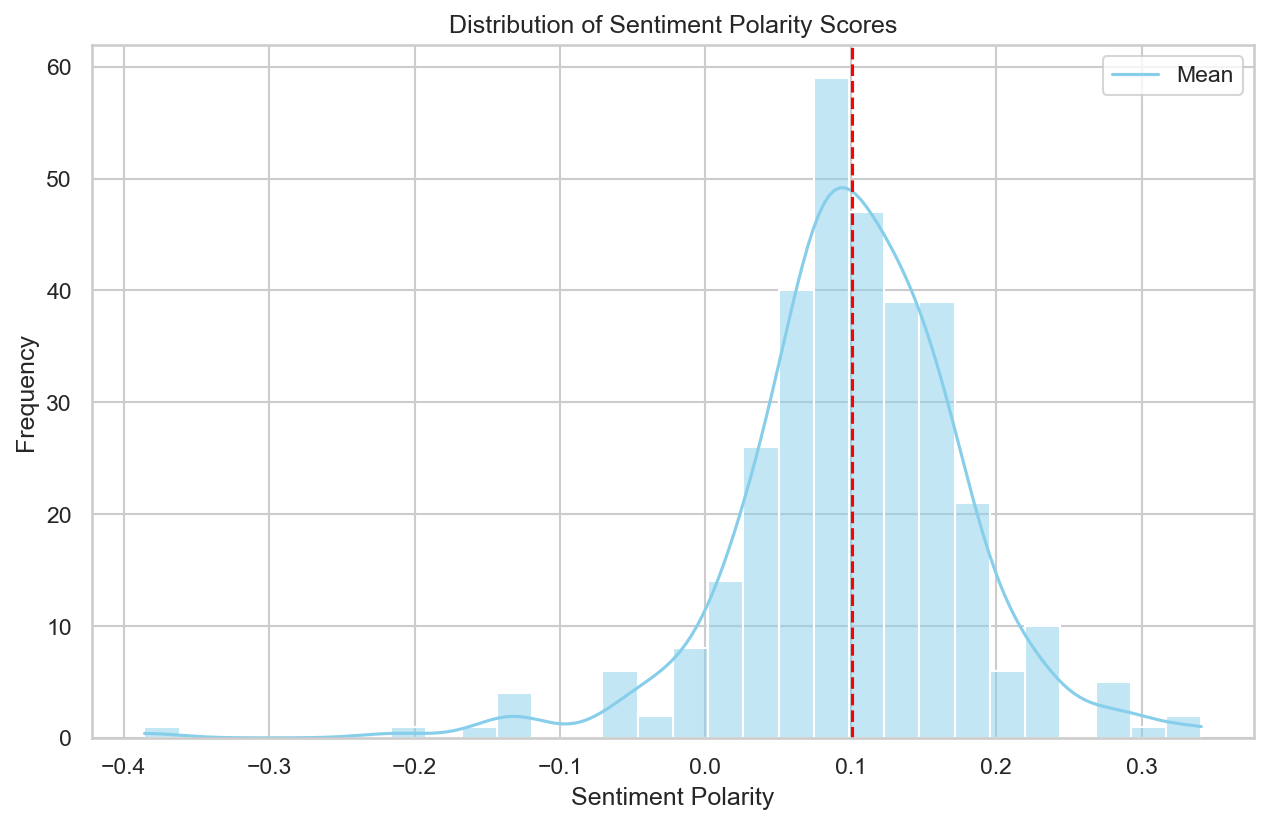

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(en_items['sentiment_polarity'], kde=True, bins=30, color="skyblue")
plt.title('Distribution of Sentiment Polarity Scores')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.axvline(en_items['sentiment_polarity'].mean(), color='red', linestyle='--')
plt.legend({'Mean':en_items['sentiment_polarity'].mean()})

plt.show()


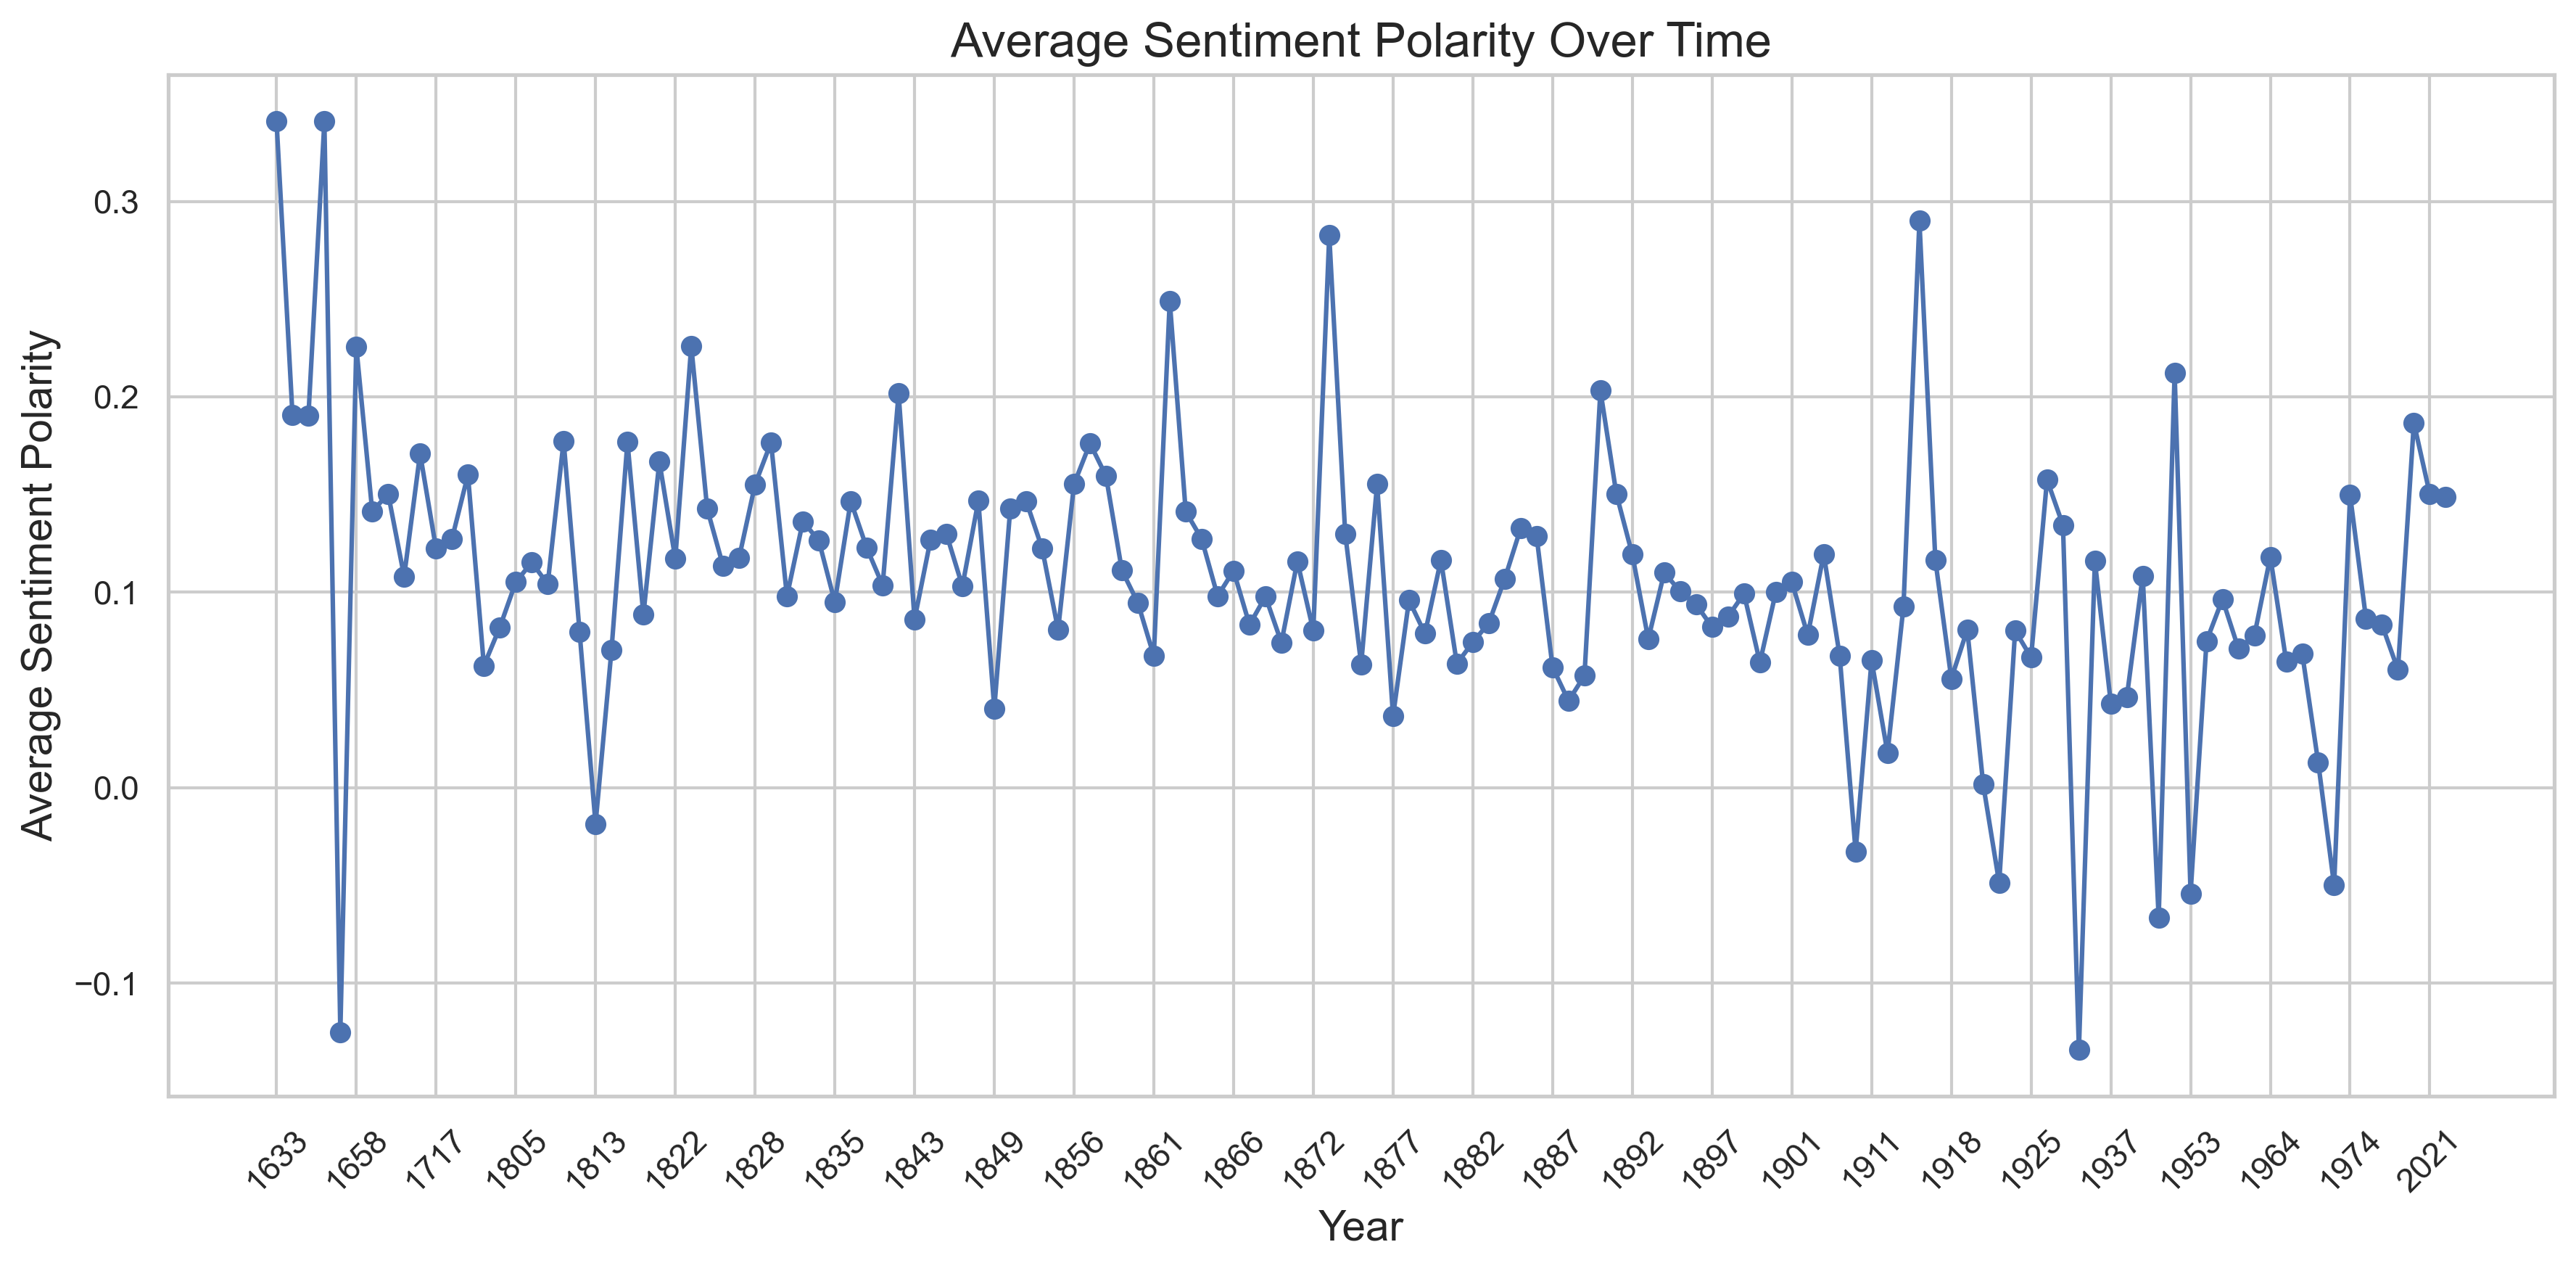

In [16]:
import numpy as np

sentiment_over_time = en_items.groupby('source.date')['sentiment_polarity'].mean().reset_index()
sentiment_over_time.columns = ['Year', 'Average Sentiment Polarity']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(sentiment_over_time['Year'], sentiment_over_time['Average Sentiment Polarity'], marker='o', linestyle='-', color='b')
years = sentiment_over_time['Year']
indices = np.arange(0, len(years), 5)
sampled_years = years.iloc[indices]
plt.xticks(sampled_years, rotation=45) 

plt.title('Average Sentiment Polarity Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Sentiment Polarity', fontsize=14)
plt.tight_layout()

plt.show()